# Practice3. Neural Network

In [480]:
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import _pickle as pickle
import time

# set default plot options
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## Set up input preprocessing

In [481]:
from utils import get_CIFAR10_data

In [482]:
X_tr, Y_tr, X_te, Y_te, mean_img = get_CIFAR10_data()
print ('Train data shape : %s,  Train labels shape : %s' % (X_tr.shape, Y_tr.shape))
print ('Test data shape : %s,  Test labels shape : %s' % (X_te.shape, Y_te.shape))

Train data shape : (10000, 3072),  Train labels shape : (10000,)
Test data shape : (1000, 3072),  Test labels shape : (1000,)


## Visualize training images

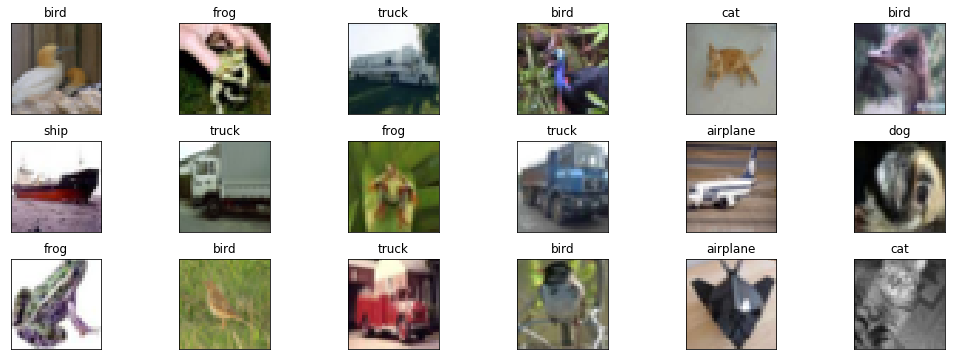

In [483]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

images_index = np.int32(np.round(np.random.rand(18,)*10000,0))

fig, axes = plt.subplots(3, 6, figsize=(18, 6),
                         subplot_kw={'xticks': [], 'yticks': []})

fig.subplots_adjust(hspace=0.3, wspace=0.05)

for ax, idx in zip(axes.flat, images_index):
    img = (X_tr[idx,:3072].reshape(32, 32, 3) + mean_img.reshape(32, 32, 3))
    ax.imshow(img)
    ax.set_title(class_names[Y_tr[idx]])
    

# 1. Softmax function

In [484]:
def softmax(x):
    
    """
    Softmax 함수를 생성하라.
    NaN가 생성되지 않도록 구현 할 것(오버플로우 방지)
    
    Inputs : 
        - x : (N,D) 차원의 벡터
    
    Output : 
        - softmax_output : (N,D) 차원의 Softmax 결과
    
    """
    
    softmax_output = None
    
    #########################################################################################################
    #------------------------------------------WRITE YOUR CODE----------------------------------------------#
    x -= np.max(x, axis = 1, keepdims = True)
    sum_x = np.sum(np.exp(x), axis = 1, keepdims = True)
    prob = np.exp(x) / sum_x
    softmax_output = prob
    #-----------------------------------------END OF YOUR CODE----------------------------------------------#
    #########################################################################################################
    
    return softmax_output


#### Softmax 구현 검증

In [485]:
temp_x = np.array([[2060,2000,2080]])
print (temp_x.shape)

(1, 3)


In [486]:
softmax_result1 = softmax(temp_x)
print (softmax_result1)

[[2.06115362e-09 1.80485138e-35 9.99999998e-01]]



    반드시 array([[2.06115362e-09, 1.80485138e-35, 9.99999998e-01]]) 과 유사한 결과를 얻어야 함

In [487]:
print (np.sum(softmax_result1))

0.9999999999999999


    반드시 0.9999999999999999 과 같은 결과를 얻어야 함

In [488]:
temp_x = np.array([[2060,2000,2080],[1010,1020,1030]])
print (temp_x.shape)

(2, 3)


In [489]:
softmax_result2 = softmax(temp_x)
print (softmax_result2)

[[2.06115362e-09 1.80485138e-35 9.99999998e-01]
 [2.06106005e-09 4.53978686e-05 9.99954600e-01]]


    반드시 array([[2.06115362e-09, 1.80485138e-35, 9.99999998e-01],  
                [2.06106005e-09, 4.53978686e-05, 9.99954600e-01]]) 과 유사한 결과를 얻어야 함.

In [490]:
print (np.sum(softmax_result2, axis=1))

[1. 1.]


    반드시 [1. 1.] 과 같은 결과를 얻어야 함.

# 2. Cross-Entropy Loss

In [491]:

def cross_entropy_loss(softmax_output, target, weights, regularization):
    
    """
    cross_entropy_loss 함수를 생성하라.
    delta를 이용하여 log값의 input으로 0이 들어가지 않도록 대처하라
    Weights를 이용한 L2 Regularization을 고려하여 구현하라
    L2 Regularization은 0.5를 곱하여 계산하라 (미분 할 때 계산적 이점)
    
    Inputs : 
        - softmax_output : Softmax의 결과로 넘어오는 (N, D) 차원의 벡터
        - target : (N, # of labels) 차원의 벡터 (One-hot encoding)
        - weights : NN 모델에 존재하는 모든 Weight 값(Dictionary 형태)
        - regularization : regularization를 결정하는 0과 1사이의 수
    
    Output : 
        - loss : scalar인 loss 값
    """
    
    delta = 1e-9
    batch_size = target.shape[0]
    data_loss = 0
    reg_loss = 0
    loss = None
    
    #########################################################################################################
    #------------------------------------------WRITE YOUR CODE----------------------------------------------#
    num_examples = softmax_output.shape[0]
    softmax_output += delta
    softmax_output = softmax_output * target
    target_loss = []
    for i in range(num_examples):
         target_loss.append(max(softmax_output[i]))
    Li = - np.log(target_loss)
    data_loss = np.sum(Li) / num_examples
    w1 = weights['W1']
    w2 = weights['W2']
    reg_loss = 0.5 * regularization * (np.sum(w2 * w2) + np.sum(w1 * w1))
    
    #-----------------------------------------END OF YOUR CODE----------------------------------------------#
    #########################################################################################################
    
    loss = data_loss + reg_loss
    
    return loss

#### cross entropy loss 구현 검증

In [492]:
temp_score0 = np.array([[0.0, 0.0, 0.0]])
temp_target0 = np.array([[0,1,0]])
print (temp_score0.shape)
print (temp_target0.shape)

(1, 3)
(1, 3)


In [493]:
temp_weight1 = np.array([[0.1,0.2,0.3],[-0.5,0.3,-0.8]])
temp_weight2 = np.array([[0.9,-0.5,0.3],[0.9,0.6,-0.8]])

weights = {}
weights['W1'] = (temp_weight1)
weights['W2'] = (temp_weight2)

reg_term = 0.001

In [494]:
cross_entropy_loss(temp_score0, temp_target0, weights, reg_term)

20.72530583694641

    반드시 20.72530583694641 과 유사한 결과를 얻어야 함. (NaN이 나오면 안됨)

In [495]:
temp_score1 = np.array([[0.1, 0.3, 0.6]])
temp_target1 = np.array([[0,1,0]])
print (temp_score1.shape)
print (temp_target1.shape)

(1, 3)
(1, 3)


In [496]:
cross_entropy_loss(temp_score1, temp_target1 , weights, reg_term)

1.2060128009926026

    반드시 1.2060128009926026 과 유사한 결과를 얻어야 함.

In [497]:
temp_score2 = np.array([[0.1, 0.3, 0.6],[0.2,0.4,0.4],[0.9,0.05,0.05]])
temp_target2 = np.array([[0,1,0],[0,0,1],[1,0,0]])
print (temp_score2.shape)
print (temp_target2.shape)

(3, 3)
(3, 3)


In [498]:
cross_entropy_loss(temp_score2, temp_target2 , weights, 0.001)

0.7439146816378241

    반드시 0.7439146816378243 과 유사한 결과를 얻어야 함.

# 2. Output Layer

In [499]:

class OutputLayer:
    
    """
    Softmax를 이용한 Cross-entropy loss를 계산하는 Ouput Layer class를 생성하라.
    앞서 생성한 softmax() 및 cross_entropy_loss를 이용하여 구현 할 것
    forward, backward의 계산과정을 생각하여 구현할 것
    backpropagation에서 softmax의 output과 target label의 정보가 이용됨을 유념하여 구현할 것
    
    forward() : 
        - x : Forward propagation 과정에서 이전 레이어로부터 넘어오는 (N,D) 차원의 벡터
        - y : (N, # of Label) 차원의 벡터 
        - return : softmax loss
    
    backward() : 
        - dout : backpropagation 과정에서 이전 레이어로부터 넘어오는 오는 delta 값, output layer 이므로 delta = 1
        - return : dx

    """
    
    def __init__(self, weights, regularization):
        self.loss = None           # loss value
        self.output_softmax = None # Output of softmax
        self.target_label = None   # Target label (one-hot vector)
        self.weights = weights
        self.regularization = regularization
        
    def forward(self, x, y):
    
        #########################################################################################################
        #------------------------------------------WRITE YOUR CODE----------------------------------------------#
        
        self.output_softmax = softmax(x)
        self.target_label = y
        self.loss = cross_entropy_loss(self.output_softmax, self.target_label, self.weights, self.regularization)
        
        #-----------------------------------------END OF YOUR CODE----------------------------------------------#
        #########################################################################################################
    
        return self.loss
    
    def backward(self, dout=1):
        
        bt_size = self.target_label.shape[0]
        dx = None
        
        #########################################################################################################
        #------------------------------------------WRITE YOUR CODE----------------------------------------------#
        
        dx = (self.output_softmax - self.target_label) / bt_size * dout
        
        #-----------------------------------------END OF YOUR CODE----------------------------------------------#
        #########################################################################################################
        
        return dx

In [500]:
outputlayer = OutputLayer(weights, reg_term)

In [501]:
temp_x1 = np.array([[3, -10, 0.7]])
temp_t1 = np.array([[0,1,0]])
print (temp_x1.shape)
print (temp_t1.shape)

(1, 3)
(1, 3)


In [502]:
outputlayer.forward(temp_x1, temp_t1)

13.097100867144416

    반드시 13.097100867144416 값과 같은 결과를 얻어야 함

In [503]:
outputlayer.backward()

array([[ 0.90887517, -0.99999794,  0.09112277]])

    반드시 array([[ 0.90887517, -0.99999795,  0.09112277]]) 값과 유사한 결과를 얻어야 함

In [504]:
temp_x2 = np.array([[3, -10, 0.7],[9,15,-1],[-5,1,-1]])
temp_t2 = np.array([[0,1,0],[1,0,0],[0,0,1]])
print (temp_x2.shape)
print (temp_t2.shape)

(3, 3)
(3, 3)


In [505]:
outputlayer.forward(temp_x2, temp_t2)

7.077588386844261

    반드시 7.077588386844261 값과 유사한 결과를 얻어야 함

In [506]:
outputlayer.backward()

array([[ 3.02958391e-01, -3.33332648e-01,  3.03742583e-02],
       [-3.32509125e-01,  3.32509089e-01,  3.77523017e-08],
       [ 7.26174119e-04,  2.92959415e-01, -2.93685588e-01]])

    반드시 array([[ 3.02958391e-01, -3.33332649e-01,  3.03742579e-02],  
                 [-3.32509126e-01,  3.32509088e-01,  3.74189683e-08],  
                 [ 7.26173786e-04,  2.92959414e-01, -2.93685588e-01]]) 값과 유사한 결과를 얻어야 함.

# 3. ReLU

In [507]:
class ReLU:
    
    """
    ReLU를 구현하라
    forward, backward의 계산과정을 생각하여 구현할 것
    backpropagation에서 forward 과정에서 사용 된 mask 정보가 사용됨을 유념하여 구현할 것
    
    forward() : 
        - x : Forward propagation 과정에서 이전 레이어로부터 넘어오는 (N,D) 차원의 벡터
        - return : ReLU output
    
    backward() : 
        - dout : backpropagation 과정에서 이전 레이어로부터 넘어오는 오는 delta 값
        - return : dx
    
    """
    
    def __init__(self):
        
        self.mask = None
        
    def forward(self, x):
        
        self.out = None
    
        #########################################################################################################
        #------------------------------------------WRITE YOUR CODE----------------------------------------------#
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        #-----------------------------------------END OF YOUR CODE----------------------------------------------#
        #########################################################################################################
    
        return out
    
    def backward(self, dout):
    
        dx = None
        
        #########################################################################################################
        #------------------------------------------WRITE YOUR CODE----------------------------------------------#
        dout[self.mask] = 0
        dx = dout
        #-----------------------------------------END OF YOUR CODE----------------------------------------------#
        #########################################################################################################
        
        return dx

In [508]:
relu = ReLU()

In [509]:
temp_x1 = np.array([[3, -10, 0.7]])
temp_x2 = np.array([[-10,1,0]])
print (temp_x1.shape)
print (temp_x2.shape)

(1, 3)
(1, 3)


In [510]:
relu.forward(temp_x1)

array([[3. , 0. , 0.7]])

    반드시 array([[3. , 0. , 0.7]]) 값과 같은 결과를 얻어야 함

In [511]:
relu.backward(temp_x2)

array([[-10,   0,   0]])

    반드시 array([[-10,   0,   0]]) 값과 같은 결과를 얻어야 함

In [512]:
temp_x3 = np.array([[3, -10, 0.7],[9,15,-1],[-5,1,-1]])
temp_x4 = np.array([[3,5,-10],[5,-4,2],[-3,-5,3]])
print (temp_x3.shape)
print (temp_x4.shape)

(3, 3)
(3, 3)


In [513]:
relu.forward(temp_x3)

array([[ 3. ,  0. ,  0.7],
       [ 9. , 15. ,  0. ],
       [ 0. ,  1. ,  0. ]])

    반드시 array([[ 3. ,  0. ,  0.7],
                 [ 9. , 15. ,  0. ],
                 [ 0. ,  1. ,  0. ]]) 값과 같은 결과를 얻어야 함

In [514]:
relu.backward(temp_x4)

array([[  3,   0, -10],
       [  5,  -4,   0],
       [  0,  -5,   0]])

    반드시 array([[  3,   0, -10],
                 [  5,  -4,   0],
                 [  0,  -5,   0]]) 값과 같은 결과를 얻어야 함

# 4. Sigmoid

In [515]:
class Sigmoid:
    
    """
    Sigmoid 구현하라
    forward, backward의 계산과정을 생각하여 구현할 것
    backpropagation 과정에서 forward 과정에서 나온 계산 결과가 사용됨을 유념하여 구현할 것
    
    forward() : 
        - x : Forward propagation 과정에서 이전 레이어로부터 넘어오는 (N,D) 차원의 벡터
        - return : Sigmoid output
    
    backward() : 
        - dout : backpropagation 과정에서 이전 레이어로부터 넘어오는 오는 delta 값
        - return : dx
    
    """
    
    def __init__(self):
        self.out = None
        
    def forward(self, x):
    
        #########################################################################################################
        #------------------------------------------WRITE YOUR CODE----------------------------------------------#
        out = 1 / (1 + np.exp(-x))
        self.out = out
        #-----------------------------------------END OF YOUR CODE----------------------------------------------#
        #########################################################################################################
    
        return out
    
    def backward(self, dout):
        
        dx = None
        
        #########################################################################################################
        #------------------------------------------WRITE YOUR CODE----------------------------------------------#
        dx = dout * (1.0 - self.out) * self.out
        #-----------------------------------------END OF YOUR CODE----------------------------------------------#
        #############################################################################################s############
        
        return dx

In [516]:
sigmoid = Sigmoid()

In [517]:
temp_x1 = np.array([[3, -10, 0.7]])
temp_t1 = np.array([[0,1,0]])
print (temp_x1.shape)
print (temp_t1.shape)

(1, 3)
(1, 3)


In [518]:
sigmoid.forward(temp_x1)

array([[9.52574127e-01, 4.53978687e-05, 6.68187772e-01]])

    반드시 array([[9.52574127e-01, 4.53978687e-05, 6.68187772e-01]]) 값과 유사한 결과를 얻어야 함 

In [519]:
sigmoid.backward(temp_x1)

array([[ 0.13552998, -0.00045396,  0.15519901]])

    반드시 array([[ 0.13552998, -0.00045396,  0.15519901]]) 값과 유사한 결과를 얻어야 함

In [520]:
temp_x2 = np.array([[3, -10, 0.7],[9,15,-1],[-5,1,-1]])
temp_t2 = np.array([[0,1,0],[1,0,0],[0,0,1]])
print (temp_x2.shape)
print (temp_t2.shape)

(3, 3)
(3, 3)


In [521]:
sigmoid.forward(temp_x2)

array([[9.52574127e-01, 4.53978687e-05, 6.68187772e-01],
       [9.99876605e-01, 9.99999694e-01, 2.68941421e-01],
       [6.69285092e-03, 7.31058579e-01, 2.68941421e-01]])

    반드시 array([[9.52574127e-01, 4.53978687e-05, 6.68187772e-01],  
                 [9.99876605e-01, 9.99999694e-01, 2.68941421e-01],  
                 [6.69285092e-03, 7.31058579e-01, 2.68941421e-01]]) 값과 유사한 결과를 얻어야 함         

In [522]:
sigmoid.backward(temp_x2)

array([[ 1.35529979e-01, -4.53958077e-04,  1.55199011e-01],
       [ 1.11041415e-03,  4.58853200e-06, -1.96611933e-01],
       [-3.32402834e-02,  1.96611933e-01, -1.96611933e-01]])

    반드시 array([[ 1.35529979e-01, -4.53958077e-04,  1.55199011e-01],  
                 [ 1.11041415e-03,  4.58853200e-06, -1.96611933e-01],  
                 [-3.32402834e-02,  1.96611933e-01, -1.96611933e-01]]) 값과 유사한 결과를 얻어야 함

# 5. Affine

In [523]:
class Affine:
    
    """
    Affine 계층을 구현하라
    Affine 계층이란 Y = np.dot(X, W) + B (X는 입력, W는 가중치, B는 바이어스)와 같은 한 뉴런의 가중치합을 계산하는 것
    forward, backward의 계산과정을 생각하여 구현할 것
    Backward 과정에서 W,b 그리고 x 까지 모두 사용됨을 유의하여 구현할 것
    
    forward() : 
        - x : Forward propagation 과정에서 이전 레이어로부터 넘어오는 (N,D) 차원의 벡터
        - return : Affine output
    
    backward() : 
        - dout : backpropagation 과정에서 이전 레이어로부터 넘어오는 오는 delta 값
        - return : dx
    
    """
    
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None
        
    def forward(self, x):
        
        out = None
    
        #########################################################################################################
        #------------------------------------------WRITE YOUR CODE----------------------------------------------#
        self.x = x
        out = np.dot(x, self.W) + self.b
        #-----------------------------------------END OF YOUR CODE----------------------------------------------#
        #########################################################################################################
    
        return out
    
    def backward(self, dout):
        
        dx = None
        
        #########################################################################################################
        #------------------------------------------WRITE YOUR CODE----------------------------------------------#
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis = 0)
        #-----------------------------------------END OF YOUR CODE----------------------------------------------#
        #########################################################################################################
        
        return dx

In [524]:
temp_W = np.array([[0.2, -0.3, 0.6], [-0.9, 0.1, -0.4]])
temp_b = np.array([[0.2, -0.3, 0.6]])
print (temp_W.shape)
print (temp_b.shape)

(2, 3)
(1, 3)


In [525]:
temp_x = np.array([[0.2, -0.3], [-0.9, 0.1]])
print (temp_x.shape)

(2, 2)


In [526]:
affine = Affine(temp_W, temp_b)

In [527]:
affine.forward(temp_x)

array([[ 0.51, -0.39,  0.84],
       [-0.07, -0.02,  0.02]])

    반드시 array([[ 0.51, -0.39,  0.84],  
                 [-0.07, -0.02,  0.02]]) 값과 같은 결과를 얻어야 함

In [528]:
temp_t = np.array([[0.1, 0.5, -0.8], [0.4, 0.7, -0.2]])
affine.backward(temp_t)

array([[-0.61,  0.28],
       [-0.25, -0.21]])

    반드시 array([[-0.61,  0.28],
                  [-0.25, -0.21]]) 값과 같은 결과를 얻어야 함

In [529]:
affine.dW

array([[-0.34, -0.53,  0.02],
       [ 0.01, -0.08,  0.22]])

    반드시 array([[-0.34, -0.53,  0.02],
                  [ 0.01, -0.08,  0.22]]) 값과 같은 결과를 얻어야 함

In [530]:
affine.db

array([ 0.5,  1.2, -1. ])

    반드시 array([ 0.5,  1.2, -1. ]) 값과 같은 결과를 얻어야 함

# 6. TwoLayerNN

### 1) TwoLayerNet 구현하기

In [531]:
from collections import OrderedDict
from utils import numerical_gradient
class TwoLayerNet:
    
    """

    __init__() : 
        - Weight 및 bias를 initialization 하는 함수
        - Initialization 된 Weight와 bias를 이용하여 계층을 생성하는 함수
    
    predict() : 
        - Input data(x)에 대해서 Neural network의 forward propagtion을 수행하는 함수
        
    loss() : 
        - Input data(x)에 대해서 Neural network의 forward propagtion을 수행한 결과를 이용하여 Loss를 계산하는 함수
        
    accuracy() :
        - Input data(x)의 결과와 True label(y)을 이용하여 Accuracy를 구하는 함수
        
    numerical_gradient() :
        - Input data(x)와 True label(y)을 이용하여 Numerical_gradient를 구하는 함수
        - Backpropagation 방법과의 비교를 위해 사용
        
    gradient():
        - Input data(x)와 True label(y)을 이용하여 Backpropagation을 수행하는 함수

    """

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01, regularization = 0.0):

        # 가중치 초기화
        # Weight initialization
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros(output_size)

        self.weights = {}
        self.weights['W1'] = self.params['W1']
        self.weights['W2'] = self.params['W2']
        
        self.reg = regularization

        # 계층 생성
        # Layer generation
        self.layers = OrderedDict() # infromation about OrderedDict (https://pymotw.com/2/collections/ordereddict.html)
        
        #########################################################################################################
        # TwoLayerNet을 구현하라                                                                                 
        # Neural Network의 구조는 다음과 같이 구현할 것                                                           
        # [ Input => Fully Connected => ReLU => Fully Connected(OutputLayer) ]
        # 구현시 위 과정에서 생성한 Class(Affine, ReLU)들 및 Weight initialization 과정에서 생성한 weight를 이용하여 구현할 것
        #########################################################################################################
        #------------------------------------------WRITE YOUR CODE----------------------------------------------#
        # self.layers['Affine1'] = None
        # self.layers['Relu1'] = None
        # self.layers['Affine2'] = None
        
        self.layers['Affine1'] = Affine(self.weights['W1'], self.params['b1'])
        self.layers['ReLU'] = ReLU()
        self.layers['Affine2'] = Affine(self.weights['W2'], self.params['b2'])
        
        #-----------------------------------------END OF YOUR CODE----------------------------------------------#
        #########################################################################################################
        self.lastLayer = OutputLayer(self.weights, self.reg)

    def predict(self, x):

        for layer in self.layers.values():
            x = layer.forward(x)
            
        return x

    def loss(self, x, y):
        score = self.predict(x)
        return self.lastLayer.forward(score, y)

    

    def accuracy(self, x, y):

        score = self.predict(x)
        score = np.argmax(score, axis=1)
        if y.ndim != 1 : y = np.argmax(y, axis=1)
        accuracy = np.sum(score == y) / float(x.shape[0])

        return accuracy

    def numerical_gradient(self, x, y):

        loss_W = lambda W: self.loss(x, y)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
            
        return grads

        

    def gradient(self, x, y):

        # forward
        self.loss(x, y)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse()

        for layer in layers:
            dout = layer.backward(dout)

        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        
        if self.reg != 0.0:
            
            #########################################################################################################
            # 각 Weight의 Gradient를 구할 때 Regularization에 의한 영향을 구현하라
            #########################################################################################################
            #------------------------------------------WRITE YOUR CODE----------------------------------------------#
            grads['W1'] += self.reg * self.weights['W1']
            grads['W2'] += self.reg * self.weights['W2']
            #-----------------------------------------END OF YOUR CODE----------------------------------------------#
            #########################################################################################################

        return grads

### 2) Numerical gradient vs Backpropagation

In [532]:
import time

network = TwoLayerNet(input_size=3072, hidden_size=10, output_size=10, regularization = 0.0001)

x_batch = X_tr[:3]
t_batch = Y_tr[:3]

nb_classes = 10

targets = t_batch.reshape(-1)
t_batch = np.eye(nb_classes)[targets]

start_time = time.time() 
grad_backprop = network.gradient(x_batch, t_batch)
print("[grad_backprop] running time(sec) : " +str(time.time() - start_time))

start_time = time.time() 
grad_numerical = network.numerical_gradient(x_batch, t_batch)
print("[grad_numerical] running time(sec) : "+str(time.time() - start_time))

print ()

for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

[grad_backprop] running time(sec) : 0.0010714530944824219
[grad_numerical] running time(sec) : 9.414543390274048

W1:3.6131130072259237e-12
b1:1.4791556022554496e-11
W2:1.1350704824706494e-10
b2:2.129058201960632e-09


    Running time은 grad_backprop를 사용했을 때 더 빨라야 함

    Gradient 값의 차이는  
    W1:7.965420308015262e-07  
    b1:3.8788064893238025e-11  
    W2:8.089449817202143e-07  
    b2:1.528478527079713e-09  결과와 유사하게 차이가 적어야 함
    

#### Cifar-10 dataset의 Label을 One-hot vector 형태로 바꿔주기

In [412]:
nb_classes = 10
targets = Y_tr.reshape(-1)
Y_tr_onehot = np.eye(nb_classes)[targets]

targets = Y_te.reshape(-1)
Y_te_onehot = np.eye(nb_classes)[targets]

In [413]:
input_size_=3072
hidden_size_=1024
output_size_=10
regularization_ = 0.0001

network = TwoLayerNet(input_size=input_size_, hidden_size=hidden_size_, output_size=output_size_, regularization = regularization_)

iters_num = 2000
train_size = X_tr.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list_two = []
train_acc_list_two = []
test_acc_list_two = []

iter_per_epoch = max(train_size / batch_size, 1)


for i in range(iters_num):

    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = X_tr[batch_mask]
    t_batch = Y_tr_onehot[batch_mask]

    grad = network.gradient(x_batch, t_batch) 

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    for key in ('W1','W2'):
        network.weights[key] = network.params[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list_two.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(X_tr, Y_tr_onehot)
        test_acc = network.accuracy(X_te, Y_te_onehot)
        train_acc_list_two.append(train_acc)
        test_acc_list_two.append(test_acc)

        print("Epoch : ",i / iter_per_epoch + 1, "Training acc : ", round(train_acc,2), "Test acc : ", round(test_acc,2))

Epoch :  1.0 Training acc :  0.14 Test acc :  0.16
Epoch :  2.0 Training acc :  0.34 Test acc :  0.34
Epoch :  3.0 Training acc :  0.4 Test acc :  0.38
Epoch :  4.0 Training acc :  0.43 Test acc :  0.4
Epoch :  5.0 Training acc :  0.46 Test acc :  0.41
Epoch :  6.0 Training acc :  0.49 Test acc :  0.42
Epoch :  7.0 Training acc :  0.51 Test acc :  0.44
Epoch :  8.0 Training acc :  0.53 Test acc :  0.44
Epoch :  9.0 Training acc :  0.55 Test acc :  0.46
Epoch :  10.0 Training acc :  0.58 Test acc :  0.46
Epoch :  11.0 Training acc :  0.6 Test acc :  0.47
Epoch :  12.0 Training acc :  0.6 Test acc :  0.47
Epoch :  13.0 Training acc :  0.63 Test acc :  0.47
Epoch :  14.0 Training acc :  0.65 Test acc :  0.46
Epoch :  15.0 Training acc :  0.67 Test acc :  0.46
Epoch :  16.0 Training acc :  0.68 Test acc :  0.45
Epoch :  17.0 Training acc :  0.7 Test acc :  0.46
Epoch :  18.0 Training acc :  0.71 Test acc :  0.48
Epoch :  19.0 Training acc :  0.74 Test acc :  0.49
Epoch :  20.0 Training acc

In [414]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=[10,8])
plt.plot(train_acc_list_two, label='train acc, two layer NN')
plt.plot(test_acc_list_two, label='test acc, two layer NN')
plt.title('training result on two layer NN', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.legend(loc='lower right', fontsize=15)
plt.show()

# 7. ThreeLayerNN

    TwoLayerNN 코드를 참고하여 ThreeLayerNN을 구현하고 Training/Test 하시오.

In [420]:
class ThreeLayerNet:
    
    """

    __init__() : 
        - Weight 및 bias를 initialization 하는 함수
        - Initialization 된 Weight와 bias를 이용하여 계층을 생성하는 함수
    
    predict() : 
        - Input data(x)에 대해서 Neural network의 forward propagtion을 수행하는 함수
        
    loss() : 
        - Input data(x)에 대해서 Neural network의 forward propagtion을 수행한 결과를 이용하여 Loss를 계산하는 함수
        
    accuracy() :
        - Input data(x)의 결과와 True label(y)을 이용하여 Accuracy를 구하는 함수
        
    numerical_gradient() :
        - Input data(x)와 True label(y)을 이용하여 Numerical_gradient를 구하는 함수
        - Backpropagation 방법과의 비교를 위해 사용
    gradient():
        - Input data(x)와 True label(y)을 이용하여 Backpropagation을 수행하는 함수
        
    """

    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, weight_init_std = 0.01, regularization = 0.0):

        
        #########################################################################################################
        # TwoLayerNet을 응용하여 ThreeLayerNet 구현하라
        # Neural Network의 구조는 다음과 같이 구현할 것
        #[ Input => Fully Connected => ReLU => Fully Connected => ReLU => Fully Connected(OutputLayer) ]
        #구현시 위 과정에서 생성한 Class를 이용하여 구현할 것
        #* Hidden Layer가 증가함에 따라 바꿔야하는 요소들(Weight 및 bias 추가, Hidden Layer의 weight 수, Weight update 등)을
        #충분히 고려하여 구현할 것 *
        # Hidden Layer의 변수로 hidden_size1, hidden_size2를 사용할 것
        
        
        # Implement ThreeLayerNet applying TwoLayerNet
        # Implement Neural Network structure as follow:
        #[ Input => Fully Connected => ReLU => Fully Connected => ReLU => Fully Connected(OutputLayer) ]
        # Implement using the Class previously made
        # * Consider the elements to be changed as Hidden Layer increase (e.g. addition of Weight and bias, number of weight in Hidden Layers, 
        #  Weight update) *
        # Use hidden_size1 and hidden_size2 as variables of Hidden Layer
        #########################################################################################################
        #########################################################################################################
        #------------------------------------------WRITE YOUR CODE----------------------------------------------#
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size1)
        self.params['b1'] = np.zeros(hidden_size1)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size1, hidden_size2) 
        self.params['b2'] = np.zeros(hidden_size2)
        self.params['W3'] = weight_init_std * np.random.randn(hidden_size2, output_size)
        self.params['b3'] = np.zeros(output_size)

        self.weights = {}
        self.weights['W1'] = self.params['W1']
        self.weights['W2'] = self.params['W2']
        self.weights['W3'] = self.params['W3']
        
        self.reg = regularization
        
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.weights['W1'], self.params['b1'])
        self.layers['ReLU1'] = ReLU()
        self.layers['Affine2'] = Affine(self.weights['W2'], self.params['b2'])
        self.layers['ReLU2'] = ReLU()
        self.layers['Affine3'] = Affine(self.weights['W3'], self.params['b3'])
        self.lastLayer = OutputLayer(self.weights, self.reg)
        
        #-----------------------------------------END OF YOUR CODE----------------------------------------------#
        #########################################################################################################

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
            
        return x

    def loss(self, x, y):        
        score = self.predict(x)
        
        return self.lastLayer.forward(score, y)

    

    def accuracy(self, x, y):
        score = self.predict(x)
        score = np.argmax(score, axis=1)
        if y.ndim != 1 : y = np.argmax(y, axis=1)
        accuracy = np.sum(score == y) / float(x.shape[0])

        return accuracy

        

    def gradient(self, x, y):
        # forward
        self.loss(x, y)
        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse()

        for layer in layers:
            dout = layer.backward(dout)

        grads = {}
        #########################################################################################################
        # 각 Weight 및 bias의 Gradient를 구하는 부분을 구현하라
        # Implement the part obtaining Gradient of each Weight and bias
        #########################################################################################################
        #------------------------------------------WRITE YOUR CODE----------------------------------------------#
        
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db
        grads['W3'], grads['b3'] = self.layers['Affine3'].dW, self.layers['Affine3'].db
        
        #-----------------------------------------END OF YOUR CODE----------------------------------------------#
        #########################################################################################################

        return grads

ThreeLayerNet Training / Test

In [421]:
_input_size=3072
_hidden_size1=1024
_hidden_size2=1024
_output_size=10
_regularization= 0.0001

network = ThreeLayerNet(input_size=_input_size, hidden_size1=_hidden_size1, hidden_size2 = _hidden_size2, output_size = _output_size, regularization = _regularization)

iters_num = 2000
train_size = X_tr.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list_three = []
train_acc_list_three = []
test_acc_list_three = []

iter_per_epoch = max(train_size / batch_size, 1)


for i in range(iters_num):

    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = X_tr[batch_mask]
    t_batch = Y_tr_onehot[batch_mask]

    grad = network.gradient(x_batch, t_batch)

    #########################################################################################################
    # Gradient를 이용하여 Weight 및 bias를 update 하는 부분을 구현하라.
    # learning_rate 변수를 사용하여 구현할 것
    
    # Implement the Weight and bias updating part using Gradient.
    # Implement using learng_rate variable.
    #########################################################################################################
    #------------------------------------------WRITE YOUR CODE----------------------------------------------#
    for key in ('W1', 'b1', 'W2', 'b2', 'W3', 'b3'):
        network.params[key] -= learning_rate * grad[key]
    
    for key in ('W1','W2', 'W3'):
        network.weights[key] = network.params[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list_two.append(loss)
    #-----------------------------------------END OF YOUR CODE----------------------------------------------#
    #########################################################################################################

    loss = network.loss(x_batch, t_batch)
    train_loss_list_three.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(X_tr, Y_tr_onehot)
        test_acc = network.accuracy(X_te, Y_te_onehot)
        train_acc_list_three.append(train_acc)
        test_acc_list_three.append(test_acc)

        print("Epoch : ",i / iter_per_epoch + 1, "Training acc : ", round(train_acc,2), "Test acc : ", round(test_acc,2))
        

Epoch :  1.0 Training acc :  0.12 Test acc :  0.12
Epoch :  2.0 Training acc :  0.24 Test acc :  0.25
Epoch :  3.0 Training acc :  0.3 Test acc :  0.32
Epoch :  4.0 Training acc :  0.37 Test acc :  0.35
Epoch :  5.0 Training acc :  0.39 Test acc :  0.39
Epoch :  6.0 Training acc :  0.43 Test acc :  0.39
Epoch :  7.0 Training acc :  0.46 Test acc :  0.42
Epoch :  8.0 Training acc :  0.49 Test acc :  0.43
Epoch :  9.0 Training acc :  0.51 Test acc :  0.41
Epoch :  10.0 Training acc :  0.53 Test acc :  0.44
Epoch :  11.0 Training acc :  0.56 Test acc :  0.44
Epoch :  12.0 Training acc :  0.53 Test acc :  0.41
Epoch :  13.0 Training acc :  0.61 Test acc :  0.46
Epoch :  14.0 Training acc :  0.63 Test acc :  0.46
Epoch :  15.0 Training acc :  0.66 Test acc :  0.46
Epoch :  16.0 Training acc :  0.64 Test acc :  0.4
Epoch :  17.0 Training acc :  0.7 Test acc :  0.46
Epoch :  18.0 Training acc :  0.71 Test acc :  0.46
Epoch :  19.0 Training acc :  0.73 Test acc :  0.46
Epoch :  20.0 Training a

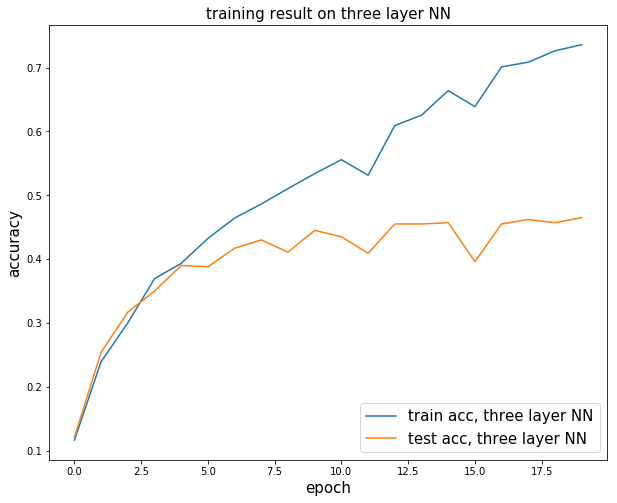

In [422]:
plt.figure(figsize=[10,8])
plt.plot(train_acc_list_three, label='train acc, three layer NN')
plt.plot(test_acc_list_three, label='test acc, three layer NN')
plt.title('training result on three layer NN', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.legend(loc='lower right', fontsize=15)
plt.show()

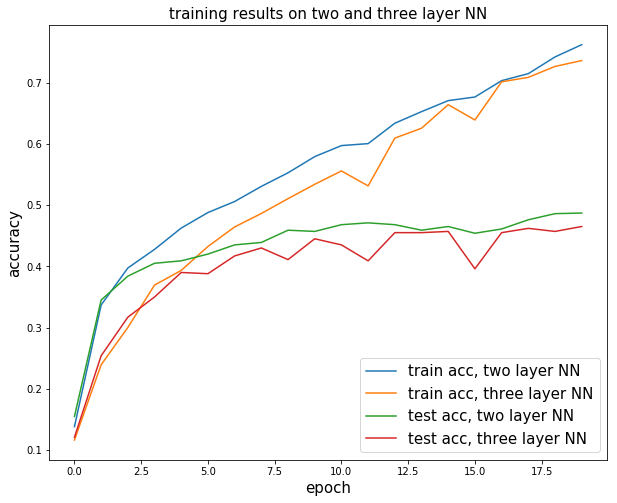

In [423]:
plt.figure(figsize=[10,8])
plt.plot(train_acc_list_two, label='train acc, two layer NN')
plt.plot(train_acc_list_three, label='train acc, three layer NN')
plt.plot(test_acc_list_two, label='test acc, two layer NN')
plt.plot(test_acc_list_three, label='test acc, three layer NN')
plt.title('training results on two and three layer NN', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.legend(loc='lower right', fontsize=15)
plt.show()